# Linear Regression

# Part 1

In [ ]:
import pandas as pd
import random
import numpy as  np
import math
from copy import deepcopy
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import operator
iterations = 1000
learning_rate = 0.009

In [ ]:
def plotgraphs(iterations,weights, ind):
    fig, ax = plt.subplots(figsize = (7,9))  
    ax.plot(np.arange(iterations),weights , 'r')  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('wts')  
    ax.set_title('wt:' + str(ind) + ' vs. Training Epoch')  

In [3]:
data = pd.read_csv('AdmissionDataset/data.csv')

In [4]:
data = data.drop('Serial No.',axis = 1)

## Normalizing Data

In [5]:
#data= data.apply(lambda x: x/x.max(), axis=0)

In [6]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74


In [7]:
train_data = data.sample(frac = 0.8, random_state = 200)
valid_data = data.drop(train_data.index)
# split = int(0.8*data.shape[0])
# train_data = data[:split]
# valid_data  = data[split:]

In [8]:
train_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
198,315,101,3,3.5,4.5,9.13,0,0.79
39,312,105,2,2.5,3.0,8.12,0,0.64
215,308,110,3,3.5,3.0,8.00,1,0.46
303,312,108,3,3.5,3.0,8.53,0,0.69
377,321,109,4,4.0,4.0,8.68,1,0.69


In [9]:
datamatrix  = train_data.iloc[:,0:7]
print(datamatrix.head())
trainmean = datamatrix.mean()
trainstd = datamatrix.std()
datamatrix = (datamatrix - datamatrix.mean())/datamatrix.std()
datamatrix.insert(loc=0, column ='ones', value=1)
actual_values = train_data['Chance of Admit '].values
actual_y_values = valid_data['Chance of Admit '].values
actual_values = np.reshape(actual_values,(360,1))
datamatrix = np.array(datamatrix)
print(datamatrix.shape)
weights = np.zeros([1,8])
print(weights)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
198        315          101                  3  3.5   4.5  9.13         0
39         312          105                  2  2.5   3.0  8.12         0
215        308          110                  3  3.5   3.0  8.00         1
303        312          108                  3  3.5   3.0  8.53         0
377        321          109                  4  4.0   4.0  8.68         1
(360, 8)
[[0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
def jcost(datamatrix,actual,wts):
    predicted = (datamatrix @ wts.T)
    #print(predicted)
    error_vector = np.power(actual - predicted,2)
    #print(error_vector)
    #print(len(datamatrix))
    return np.sum(error_vector)/(2*len(datamatrix))

In [11]:
jcost(datamatrix,actual_values,weights)

0.26941625

In [12]:
weightstho = []

In [13]:
def gd(datamatrix,actual_values,wts):
    cost = []
    for i in range(iterations):
        bias  =  (( (datamatrix @ wts.T) - actual_values).T)@datamatrix 
        weightstho.append(wts)

        wts = wts - ((learning_rate/(len(datamatrix))))*bias
        #print(wts)
        cost.append(jcost(datamatrix,actual_values,wts))
    return cost, wts

In [14]:
valid_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
3,326,113,5,4.5,4.0,9.40,1,0.91
6,322,110,5,4.5,4.0,8.97,0,0.78
7,307,107,2,3.0,3.5,8.52,1,0.78


In [15]:
valid_data = valid_data.drop('Chance of Admit ',axis = 1 )
valid_data = (valid_data - trainmean)/trainstd
valid_data.insert(loc=0, column ='ones', value=1)
valid_data.head()

,ones,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,0.048406,-0.698510,-0.986945,-0.881652,-1.567208,-0.719522,-1.091697
1,1,0.223542,0.130855,-0.105307,-0.375440,0.052490,-0.070496,0.913461
3,1,0.836518,0.960221,1.657969,1.143194,0.592390,1.360689,0.913461
6,1,0.486246,0.462602,1.657969,1.143194,0.592390,0.645096,-1.091697
7,1,-0.827274,-0.035018,-0.986945,-0.375440,0.052490,-0.103779,0.913461


In [16]:
valid_data.head()
valid_data = valid_data.iloc[:,0:8]
valid_data.head()

,ones,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,0.048406,-0.698510,-0.986945,-0.881652,-1.567208,-0.719522,-1.091697
1,1,0.223542,0.130855,-0.105307,-0.375440,0.052490,-0.070496,0.913461
3,1,0.836518,0.960221,1.657969,1.143194,0.592390,1.360689,0.913461
6,1,0.486246,0.462602,1.657969,1.143194,0.592390,0.645096,-1.091697
7,1,-0.827274,-0.035018,-0.986945,-0.375440,0.052490,-0.103779,0.913461


In [ ]:
def jcost(datamatrix,actual,wts,lambd):
    predicted = (datamatrix @ wts.T)
    #print(predicted)
    error_vector = np.power(actual - predicted,2)
    regularized_
    #print(error_vector)
    #print(len(datamatrix))
    return np.sum(error_vector)/(2*len(datamatrix))

# Part 2 and Part 3

In [17]:
cost,wts = gd(datamatrix,actual_values,weights)
pred = valid_data.dot(wts.T)
pred = np.array(pred)
rms = 0
abserror = 0
for i,j in zip(pred,actual_y_values):
    print(i,j)
    rms += math.pow(j-i,2)
    abserror += abs(j-i)

rms = rms/(len(actual_y_values))
abserror = abserror/(len(actual_y_values))

[0.60700145] 0.65
[0.73706904] 0.71
[0.88381853] 0.91
[0.79044247] 0.78
[0.6995617] 0.78
[0.97005041] 0.96
[0.66547777] 0.7
[0.64834013] 0.5
[0.68241331] 0.63
[0.89436152] 0.95
[0.54312092] 0.56
[0.66554362] 0.69
[0.66371371] 0.69
[0.66325344] 0.74
[0.55137943] 0.64
[0.85680942] 0.89
[0.82029904] 0.8
[0.89170395] 0.86
[0.52223229] 0.44
[0.89912987] 0.93
[0.59917276] 0.67
[0.70713165] 0.7
[0.51034497] 0.56
[0.86255294] 0.88
[0.61875763] 0.61
[0.6411982] 0.61
[0.51400886] 0.54
[0.63094729] 0.54
[0.73083803] 0.71
[0.91149932] 0.91
[0.64786464] 0.7
[0.71832745] 0.74
[0.714399] 0.69
[0.58977852] 0.48
[0.56094201] 0.68
[0.90462262] 0.89
[0.6929849] 0.77
[0.6528198] 0.61
[0.73699913] 0.79
[0.72971271] 0.57
[0.81481734] 0.82
[0.58186013] 0.62
[0.78137634] 0.79
[0.79231593] 0.77
[0.60780173] 0.53
[0.94131686] 0.94
[0.65389678] 0.75
[0.41882999] 0.46
[0.92962083] 0.91
[0.83905441] 0.84
[0.88248728] 0.91
[0.9552704] 0.93
[0.70369514] 0.73
[0.75738605] 0.8
[0.61910112] 0.65
[0.66560585] 0.64
[0.66

In [18]:
print("Root mean square :",rms)
print("Absolute Error: ",abserror)

Root mean square : 0.0033661053284934645
Absolute Error:  [0.04364847]


In [19]:
print(wts)

[[ 7.19720271e-01  2.27041665e-02  2.37372842e-02  8.68893380e-03
  -1.02382102e-04  1.80821038e-02  6.16394657e-02  1.47133382e-02]]


# Error vs iterations graph

Text(0.5, 1.0, 'Error vs. Training Epoch')

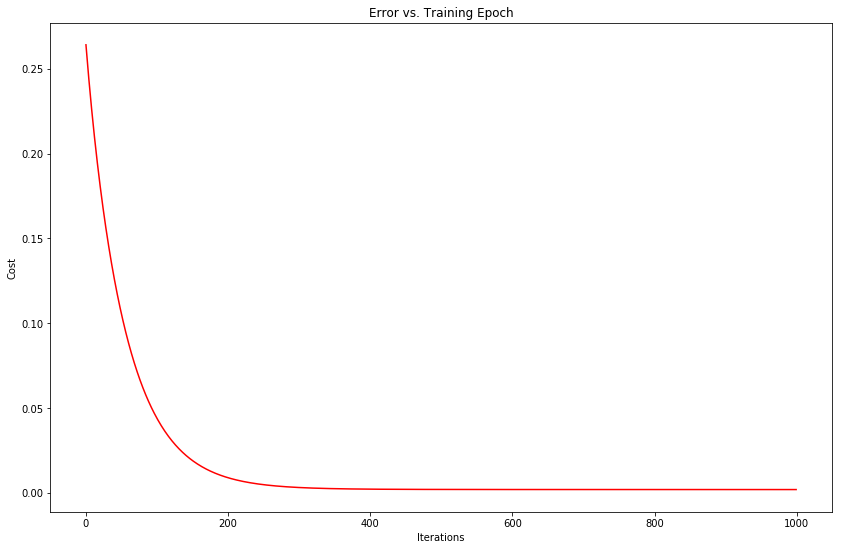

In [20]:
fig, ax = plt.subplots(figsize = (14,9))  
ax.plot(np.arange(iterations),cost , 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

# R2 Score

In [21]:
from sklearn.metrics import r2_score
r2_score(actual_y_values,pred)

0.8004870978376493

In [22]:
wts

array([[ 7.19720271e-01,  2.27041665e-02,  2.37372842e-02,
         8.68893380e-03, -1.02382102e-04,  1.80821038e-02,
         6.16394657e-02,  1.47133382e-02]])

# Plotting graph of wieghts vs iterations

wieght: 0


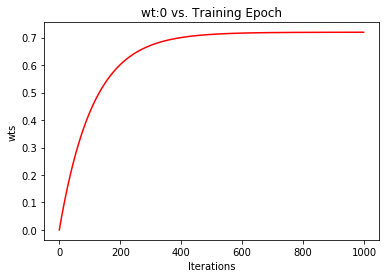

wieght: 1


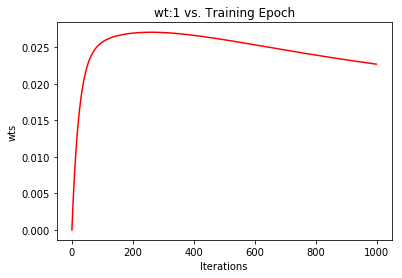

wieght: 2


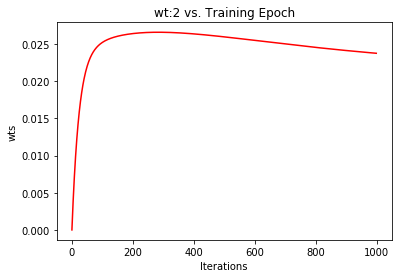

wieght: 3


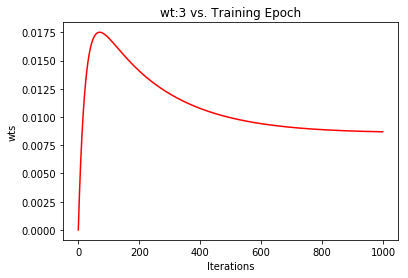

wieght: 4


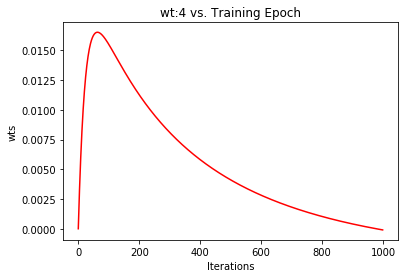

wieght: 5


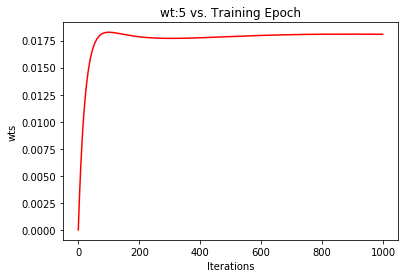

wieght: 6


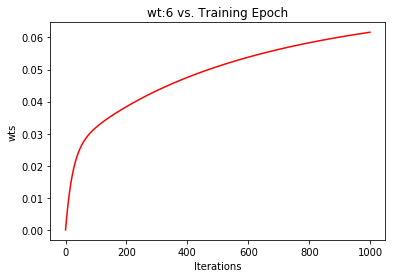

wieght: 7


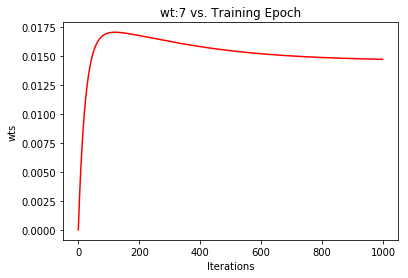

In [23]:
for j in range(len(wts[0])):
    wt = []
    print("wieght: "+str(j))
    for i in range(iterations):
        wt.append(weightstho[i][0][j])
    fig, ax = plt.subplots()  
    ax.plot(np.arange(iterations),wt , 'r')  
    ax.set_xlabel('Iterations')  
    ax.set_ylabel('wts')  
    ax.set_title('wt:' + str(j) + ' vs. Training Epoch') 
    plt.show()
    